<a href="https://colab.research.google.com/github/Abdansb/NoCopyZone/blob/main/NoCopyZone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Run this code with Runtime > Run all

# To-Do

*   scrape via HTTP traffic
*   scrape via source (js, html, and other files)

<div>
<img src="https://drive.usercontent.google.com/download?id=1kh0VlEu1NDOVqXyYKHzFviRMCyIOwpgZ&export=download&authuser=0&confirm=t&uuid=39cde4b1-3c0f-49a2-9624-162fc043d877&at=APZUnTXs12dtKQbVEqDxjjwtmEw2:1702054613486" width="400"/>
</div>





# Install Dependecies

Bash scripting, accessing google colab terminal. Install python packages to their OS

In [1]:
! pip install requests bs4
! pip install selenium
! pip install ipython-autotime
! apt-get update
! apt install chromium-chromedriver

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=81b5d0fdf7413e99ebb05e290edc5de8ae7c349fa04b6c090765ac6c3fe3d274
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security

# Using Selenium & Regular Expression

*   Weekend kulik TDD Test-driven development
*   Currently scrape all links in "a" tag
*   PR! some websites use hidden js


<img src="https://images.spiceworks.com/wp-content/uploads/2022/09/29095630/How-TDD-Works.png" width="400"/>
</div>



In [6]:
# Run this again if encountered connection refused
# Imports and configure chrome browser
%load_ext autotime
import time
import re
import html
from itertools import product
from urllib.parse import urlparse
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import WebDriverException

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #headless means no graphical user interface
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.15 s (started: 2023-12-10 16:57:13 +00:00)


## Scrape HTML Page
### Replace main_page URL with website you want to crawl

example:
* https://vidio.com
* https://www.livescore90bola.

not accepted URL:
* `https://example.com/`
* `https://example.com#`

(additional char after domain)


https://livescore90bola.com/banner7.html
https://livescore90bola.com/banner6.html
https://livescore90bola.com/javascript:window.scroll(0,0);
https://livescore90bola.com/champion.html
https://www.googletagmanager.com/gtag/js?id=G-D0QLF7WJN2&l=dataLayer&cx=c
https://livescore90bola.com///freelive.7msport.com/U_fLeftRight.aspx?width=815&height=25&file=1&mark=3&title=scores&urls=http://&timezone="%2B0700"&dstbox=
https://www.googletagmanager.com/gtag/js?id=G-GLFZLGGXBP
https://livescore90bola.com/bursa.html
https://www.googletagmanager.com/gtag/js?id=UA-242808828-1&l=dataLayer&cx=c
https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://livescore90bola.com/eropa.html
https://livescore90bola.com/90bola.htm
https://livescore90bola.com/./banner3.html
https://855group.page.link/fifa855
https://www.googletagmanager.com/gtag/js?id=G-D0QLF7WJN2
https://livescore90bola.com/sitemap.xml
https://www.googletagmanager.com/gtag/js?id=G-GLFZLGGXBP&l=dataLayer&cx=c
https://livescore90bola.com/./b
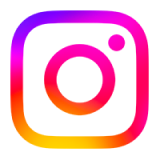
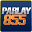
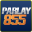
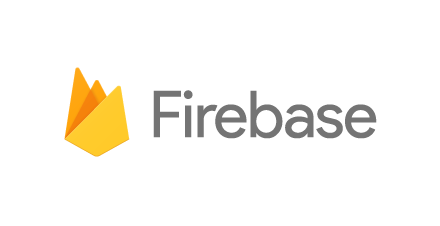
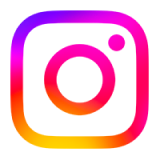

In [7]:
main_page = 'https://livescore90bola.com'
parsed_url = urlparse(main_page)
main_domain = f"{parsed_url.scheme}://{parsed_url.netloc}"
driver.get(main_page)

# List of unique tag names and attribute prefixes
tag_names = ['a', 'div', 'script', 'iframe']
prefix_string = ['href=', 'src=']
# Generate combinations
combinations = product(tag_names, prefix_string)

level1 = []

def scrape_html(tag_name, prefix_string, var_to_store):

  # Get element by tag: <a> or <div> or <script>
  links = driver.find_elements(By.TAG_NAME, tag_name)

  for link in links:
    # Get raw html (ambil satu baris)
    html_string = link.get_attribute('outerHTML')

    # Capture string after prefix
    pattern = re.compile(rf'{re.escape(prefix_string)}"(.*?)"')
    pattern = pattern.search(html_string)

    if pattern:
      var_to_store.append(pattern.group(1))


def find_true_link(url_container):
  unfiltered = []
  for address in url_container:
    unfiltered.append(address)

  filter1 = []
  for f1 in unfiltered:
    if len(f1)>1:
      filter1.append(f1)

  filter2 = []
  for f2 in filter1:
    if f2.startswith("http"):
      filter2.append(f2)
    elif f2.endswith(".html"):
      filter2.append(f"{main_domain}/{f2}")
    else: filter2.append(f"{main_domain}/{f2}")

  # Remove Duplicates
  no_duplicate = list(set(filter2))
  filter3 = []

  # Remove escape sequence
  for filter in no_duplicate:
    filter3.append(html.unescape(filter))
    #print(html.unescape(filter))

  return filter3

#call
# Iterate over combinations
for tag, prefix in combinations:
    scrape_html(tag, prefix, level1)
final1 = find_true_link(level1)

for link in final1:
  print(link)
print(f"\nLevel 1 result: {len(final1)} URL's")

final2 = []
level2 = []

for url in final1:
  driver.get(url)
  try:
    # Tag combinations of getting URL's
    scrape_html('a', 'href=', level2)
    scrape_html('a', 'src=', level2)
    scrape_html('div', 'href=', level2)
    scrape_html('div', 'src=', level2)
    scrape_html('script', 'href=', level2)
    scrape_html('script', 'src=', level2)
    scrape_html('iframe', 'src=', level2)
    final2 += (find_true_link(level2))
  except StaleElementReferenceException:
    continue

final2 = set(final2)

for link in final2:
  print(link)
print(f"\nLevel 2 result: {len(final2)} URL's")

final3 = []
level3 = []

for url in final2:
  try:
    driver.get(url)
  except WebDriverException:
    continue

  try:
    # Tag combinations of getting URL's
    scrape_html('a', 'href=', level3)
    scrape_html('a', 'src=', level3)
    scrape_html('div', 'href=', level3)
    scrape_html('div', 'src=', level3)
    scrape_html('script', 'href=', level3)
    scrape_html('script', 'src=', level3)
    scrape_html('iframe', 'src=', level3)
    final3 += (find_true_link(level3))
  except StaleElementReferenceException:
    continue


final3 = set(final3)

for link in final3:
  print(link)


print(f"\nLevel 3 result: {len(final3)} URL's")


In [10]:
print(type(final3))

<class 'set'>
time: 1.62 ms (started: 2023-12-10 17:13:24 +00:00)


## save result

In [25]:
#! pip install xlsxwriter
import xlsxwriter

new_list = [['first', 'second'], ['third', 'four'], [1, 2, 3, 4, 5, 6]]

# Transpose the list of lists
transposed_list = list(map(list, zip(*new_list)))

with xlsxwriter.Workbook('/content/drive/MyDrive/bola5.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(new_list):
        worksheet.write_row(row_num, 0, data)



time: 19.2 ms (started: 2023-12-10 17:52:25 +00:00)


## Get source file links

In [9]:
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(0.5)
#url launch
driver.get("https://www.livescore90bola.com/")
#JavaScript command to traffic
r = driver.execute_script("return window.performance.getEntries();")
for res in r:
  print(res['name'])
#browser close
driver.close()

https://livescore90bola.com/
visible
https://livescore90bola.com/data/livestyle.css
https://www.googletagmanager.com/gtag/js?id=G-RJTK2K3STW
https://www.googletagmanager.com/gtag/js?id=G-D0QLF7WJN2
https://www.googletagmanager.com/gtag/js?id=G-GLFZLGGXBP
https://livescore90bola.com/banner2.html
https://livescore90bola.com/banner3.html
https://livescore90bola.com/banner7.html

https://livescore90bola.com/images/90bola.png
https://livescore90bola.com/images/gs.png
https://livescore90bola.com/images/menu_icon.png
https://livescore90bola.com/images/ik.gif
https://livescore90bola.com/images/flag-list_rgb_17.png
https://freelive.7msport.com/U_fLeftRight.aspx?width=815&height=25&file=1&mark=3&title=scores&urls=http://&timezone=%22%2B0700%22&dstbox=
first-paint
first-contentful-paint
https://livescore90bola.com/banner4.html
https://livescore90bola.com/90bola.htm
https://livescore90bola.com/banner6.html
https://www.googletagmanager.com/gtag/js?id=UA-242808828-1&l=dataLayer&cx=c
https://www.goog

##v3

In [ ]:
temp = []


for url in final:
  driver.get(url)
  #for tag, prefix in combinations:
  scrape_html('a', 'href=', temp)

final2 = find_true_link(temp)


print(f"\nTotal result: {len(final2)} URL's")


In [250]:
find_true_link(temp)
for link in temp:
  print(link)
print(f"\nTotal result: {len(temp)} URL's")

https://855group.page.link/sport388
https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://livescore90bola.com/bisbol.html
https://livescore90bola.com/hasil-90bola.htm
https://gamesport855.page.link/ayoputri
https://livescore90bola.com/mailto:90bola.io@gmail.com
https://marketingratu.page.link/makauqq
https://855group.page.link/parlay855
https://gamesport.page.link/fifa855
https://livescore90bola.com//Main.aspx?ref=29C60F
https://livescore90bola.com/hdp-90bola.htm
https://www.facebook.com/90bola.io/
https://livescore90bola.com/1x2-90bola.htm
https://livescore90bola.com/90bola.htm
https://855group.page.link/fifa855
https://livescore90bola.com/kalkulator.html
https://www.youtube.com/channel/UCipz04gIxbXPeXZSrhwtBCg
https://855group.page.link/ft95
https://marketingratu.page.link/aduqq
https://livescore90bola.com/petagratis.html
https://livescore90bola.com/portugal.html
https://855group.page.link/sport855
https://marketingratu.page.link/rutinqq
https://855group.page.link/big855
h

In [ ]:
flag = True
lim = 10
temp = []
final2 = []
"""while flag:
    try:
        for link in final:
            driver.get("https://www.facebook.com/90bola.io/")
            #call
            # Iterate over combinations
            for tag, prefix in combinations:
                scrape_html(tag, prefix, temp)
            final2 = find_true_link(temp)
            print(final2)
    except Exception as e:
        print(e)"""


driver = webdriver.Chrome(options=chrome_options)
for link in final:
  #print(link)
  #driver.quit()
  for tag, prefix in combinations:
    driver.get(link)
    scrape_html(tag, prefix, temp)
    final2 = find_true_link(temp)
    print(final2)
  #final2 = find_true_link(temp)


## v2

In [ ]:
driver.get('https://livescore90bola.com')


tag = 'div'
prefix = 'src='
url = []

def scrape_html(tag_name, prefix_string):

  # Get element by tag: <a> or <div> or <script>
  links = driver.find_elements(By.TAG_NAME, tag_name)

  for link in links:
    # Get raw html (ambil satu baris)
    html_string = link.get_attribute('outerHTML')

    # Capture string after prefix
    pattern = re.compile(rf'{re.escape(prefix_string)}"(.*?)"')
    pattern = pattern.search(html_string)


    if pattern:
      url.append(pattern.group(1))

    #print(url)

# Tag combinations of getting URL's
scrape_html('a', 'href=')
scrape_html('a', 'src=')
scrape_html('div', 'href=')
scrape_html('div', 'src=')
scrape_html('script', 'href=')
scrape_html('script', 'src=')


for address in url:
  print(address)


/
https://www.facebook.com/90bola.io/
https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://www.instagram.com/90bola.io/
/
/
basket.html
bisbol.html
kalkulator.html
/
https://www.facebook.com/90bola.io/
jadwal.html
hasil.html
1x2.html
https://nowgoal5.io/
bursa.html
indonesia.html
champion.html
eropa.html
inggris.html
italia.html
spanyol.html
jerman.html
perancis.html
portugal.html
javascript:window.scroll(0,0);
tentang-kami.html
#
#fb
petagratis.html
sitemap.xml
#
petagratis.html
#
#
#
https://livescore90bola.com/
tentang-kami.html
#
#
https://855group.page.link/fifa855
tentang-kami.html
/
/



/
indonesia.html
indonesia.html
indonesia.html
javascript:window.scroll(0,0);
./banner2.html
./banner3.html
./banner3.html
./banner3.html
//freelive.7msport.com/U_fLeftRight.aspx?width=815&amp;height=25&amp;file=1&amp;mark=3&amp;title=scores&amp;urls=http://&amp;timezone=&quot;%2B0700&quot;&amp;dstbox=
banner4.html
90bola.htm
https://www.google-analytics.com/analytics.js
https://www.

## v1

In [14]:
driver.get('https://livescore90bola.com/')
# Get element by tag: <a> or <div> or <script>

# combinations of getting URL's

#links = driver.find_elements(By.TAG_NAME, 'a')
links = driver.find_elements(By.TAG_NAME, 'div')
#links = driver.find_elements(By.TAG_NAME, 'script')

# Iterate over links list
for link in links:

  # Get raw html (ambil satu baris)
  html_string = link.get_attribute('outerHTML')

  # Capture string after "href="
  #url_match = re.search(r'href="(.*?)"', html_string)

  # Capture string after "src="
  url_match = re.search(r'src="(.*?)"', html_string)

  if url_match:
    url = url_match.group(1)

  print(url)

import html

url_with_entities = "https://www.fctables.com/championsleague/iframe/?type=table&amp;lang_id=2&amp;country=5&amp;stage=33212&amp;team=&amp;timezone=Pacific/Midway&amp;time=24&amp;po=1&amp;ma=1&amp;wi=1&amp;dr=1&amp;los=1&amp;gf=1&amp;ga=1&amp;gd=1&amp;pts=1&amp;ng=1&amp;form=1&amp;width=auto&amp;height=160&amp;font=Verdana&amp;fs=12&amp;lh=22&amp;bg=FFFFFF&amp;fc=333333&amp;logo=1&amp;tlink=0&amp;scfs=22&amp;scfc=333333&amp;scb=1&amp;sclg=0&amp;teamls=80&amp;ths=1&amp;thb=1&amp;thba=FFFFFF&amp;thc=000000&amp;bc=dddddd&amp;hob=f5f5f5&amp;hobc=ebe7e7&amp;lc=333333&amp;sh=1&amp;hfb=1&amp;hbc=054486&amp;hfc=FFFFFF"

url_decoded = html.unescape(url_with_entities)

print(url_decoded)



from urllib.parse import urlparse

url = 'https://livescore90bola.com/champion.html'

# Mecah URL menjadi komponen-komponen
parsed_url = urlparse(url)

# Dapatkan domain dan subdomain
domain = f"{parsed_url.scheme}://{parsed_url.netloc}"
subdomain = f"{parsed_url.scheme}://{parsed_url.hostname}"

print(f'Domain: {domain}')
print(f'Subdomain: {subdomain}')



./banner2.html
./banner3.html
./banner3.html
./banner3.html
./banner3.html
./banner3.html
//freelive.7msport.com/U_fLeftRight.aspx?width=815&amp;height=25&amp;file=1&amp;mark=3&amp;title=scores&amp;urls=http://&amp;timezone=&quot;%2B0700&quot;&amp;dstbox=
banner4.html
90bola.htm
90bola.htm
90bola.htm


# Gak jadi
# Using BeautifulSoup

In [78]:
import requests
from bs4 import BeautifulSoup
import re

# import time

source_code = requests.get("https://855group.page.link/fifa855")
soup = BeautifulSoup(source_code.content, "lxml")
data = []
links = []


def remove_duplicates(l):  # remove duplicates and unURL string
    for item in l:
        match = re.search("(?P<url>[^\s]+)", item)
        if match is not None:
            links.append((match.group("url")))


for link in soup.find_all("a", href=True):
    data.append(str(link.get("href")))
flag = True
remove_duplicates(data)
lim = 50
"""while flag:
    try:
        for link in links:
            for j in soup.find_all("a", href=True):
                temp = []
                source_code = requests.get(link)
                soup = BeautifulSoup(source_code.content, "lxml")
                temp.append(str(j.get("href")))
                remove_duplicates(temp)
                print(temp)

                if len(links) > lim:  # set limitation to number of URLs
                    break
            if len(links) > lim:
                break
        if len(links) > lim:
            break
    except Exception as e:
        print(e)
        if len(links) > lim:
            break"""

for url in links:
    print(url)

print(len(links))


/?ref=29C60F
/Main.aspx?ref=29C60F
#
#
#
#
#
#
#
#
https://sosmedmaster.page.link/wa_fifa855
https://sosmedmaster.page.link/tele_fifa855
https://sosmedmaster.page.link/fb_fifa855
https://sosmedmaster.page.link/ig_fifa855
https://fifa855.rtpgacormalamini.com/
https://pkv99games.page.link/ruangqq
https://pkv99games.page.link/terimaqq
17


## test parser

In [17]:
from bs4 import BeautifulSoup
import requests

# Make an HTTP request and parse the HTML
url = "https://vidio.com/"
source_code = requests.get(url)
soup = BeautifulSoup(source_code.content, "html.parser")

# Find all script tags with a src attribute
script_tags = soup.find_all("div", href=True)

# Print the src attribute of each script tag
for script_tag in script_tags:
    print(script_tag['href'])


## input combinations

In [ ]:
from itertools import product

def scrape_html(tag_name, attribute_prefix):
    # Your implementation for scrape_html function
    # This is just a placeholder, you should replace it with your actual code
    print(f"Scraping {tag_name} with {attribute_prefix}")

# List of unique tag names and attribute prefixes
unique_tag_names = ['a', 'div', 'script', 'iframe']
unique_attribute_prefixes = ['href=', 'src=']

# Generate combinations
combinations = product(unique_tag_names, unique_attribute_prefixes)

# Iterate over combinations
for tag, prefix in combinations:
    scrape_html(tag, prefix)
